In [91]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub

Download and load dataset

In [92]:
path = kagglehub.dataset_download("shree1992/housedata")
csv = os.path.join(path, "data.csv")
print("Path to dataset files:", path)

df = pd.read_csv(csv)

Using Colab cache for faster access to the 'housedata' dataset.
Path to dataset files: /kaggle/input/housedata


Data exploration

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [94]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [95]:
df.drop(columns=["country", "street"], inplace=True)

In [96]:
df["date"] = pd.to_datetime(df["date"])
df["year_sold"] = df["date"].dt.year
df['month_sold'] = df['date'].dt.month
df['day_sold'] = df['date'].dt.day
df.drop(columns=['date'],inplace=True)

Drop year_sold column to reduce noises

In [97]:
df["year_sold"].value_counts()

,count
year_sold,
2014,4600


In [98]:
df.drop(columns=["year_sold"], inplace=True)

In [99]:
df["statezip"].value_counts()

,count
statezip,
WA 98103,148
WA 98052,135
WA 98117,132
WA 98115,130
WA 98006,110
...,...
WA 98047,6
WA 98288,3
WA 98050,2


Extract zip code from state name

In [100]:
df[['state', 'zipcode']] = df['statezip'].str.extract(r'([A-Z]+)\s+(\d+)', expand=True)
df["zipcode"] = pd.to_numeric(df["zipcode"])
df.drop(columns=["statezip"], inplace=True)

In [101]:
df["state"].value_counts()

,count
state,
WA,4600


In [102]:
df.drop(columns=["state"], inplace=True)

In [103]:
df["city"].value_counts()

,count
city,
Seattle,1573
Renton,293
Bellevue,286
Redmond,235
Kirkland,187
Issaquah,187
Kent,185
Auburn,176
Sammamish,175


Drop samples that have house prices = 0

In [104]:
df = df[df["price"] > 0]

In [105]:
df.shape

(4551, 17)

In [106]:
numeric = df.select_dtypes(include=np.number)

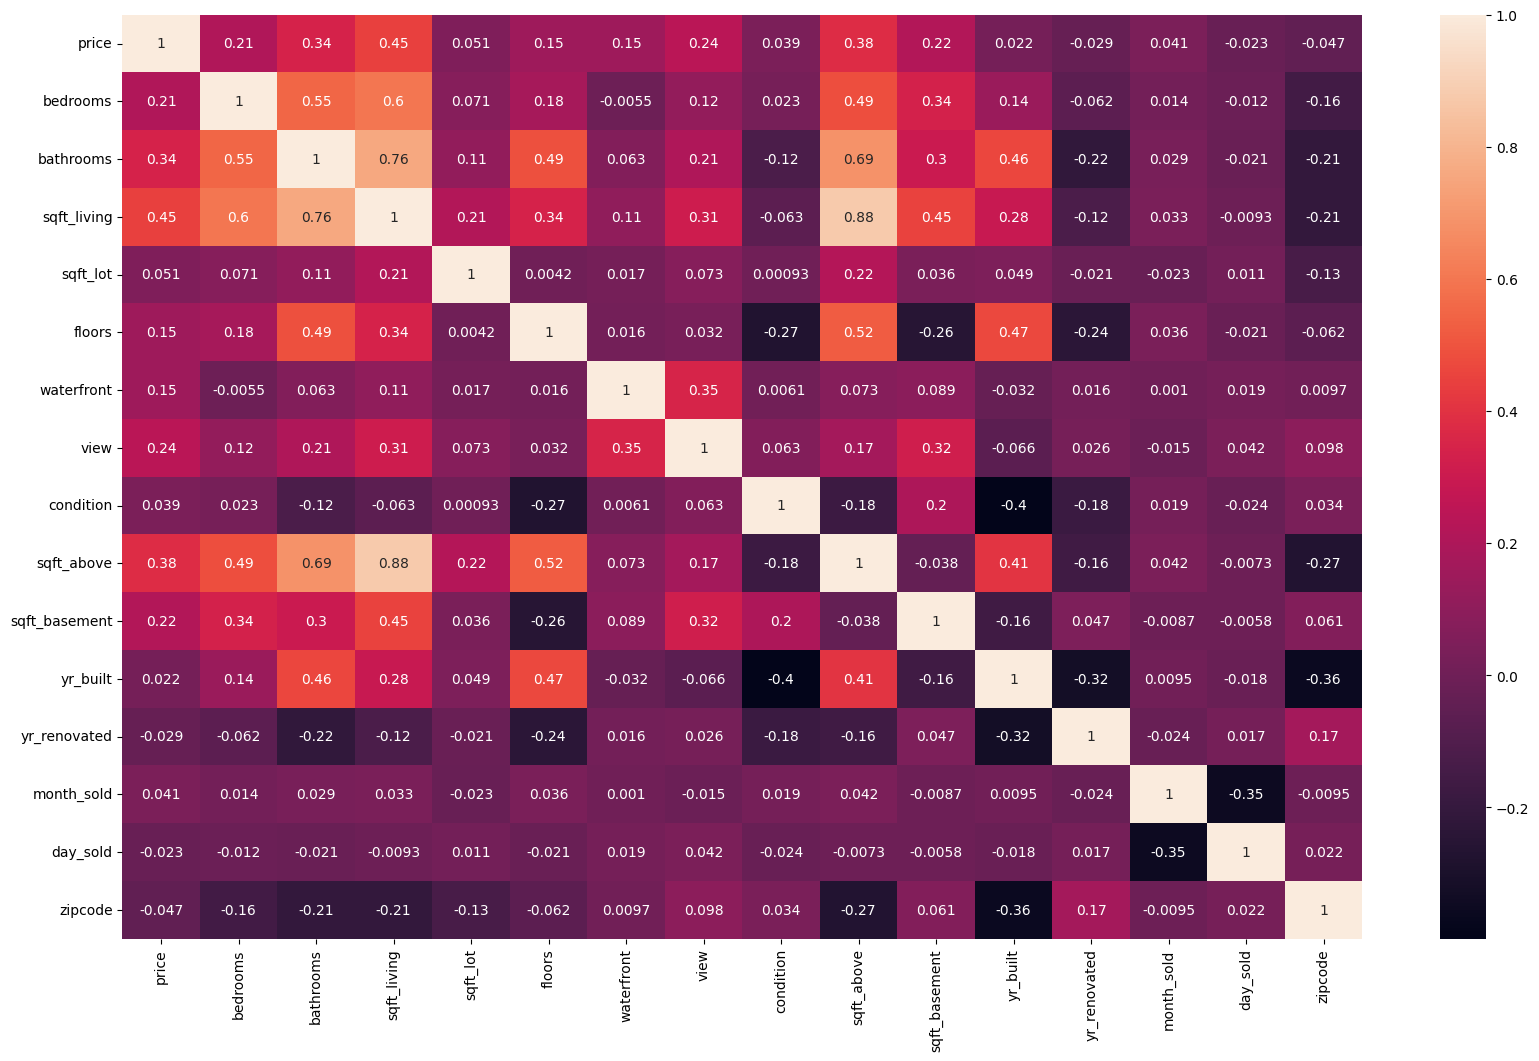

In [107]:
def heat_map(columns):
  plt.figure(figsize=(20,12))
  sns.heatmap(numeric.corr(), annot=True)

heat_map(numeric)

Features engineering:

In [108]:
df["rooms_per_floor"] = (df["bedrooms"] + df["bathrooms"]) / df["floors"]
df["lot_utilization"] = df["sqft_living"] / df["sqft_lot"]
df["is_renovated"] = (df["yr_renovated"] > 0).astype(int)
df["floor_sqft_interaction"] = df["floors"] * df["sqft_living"]

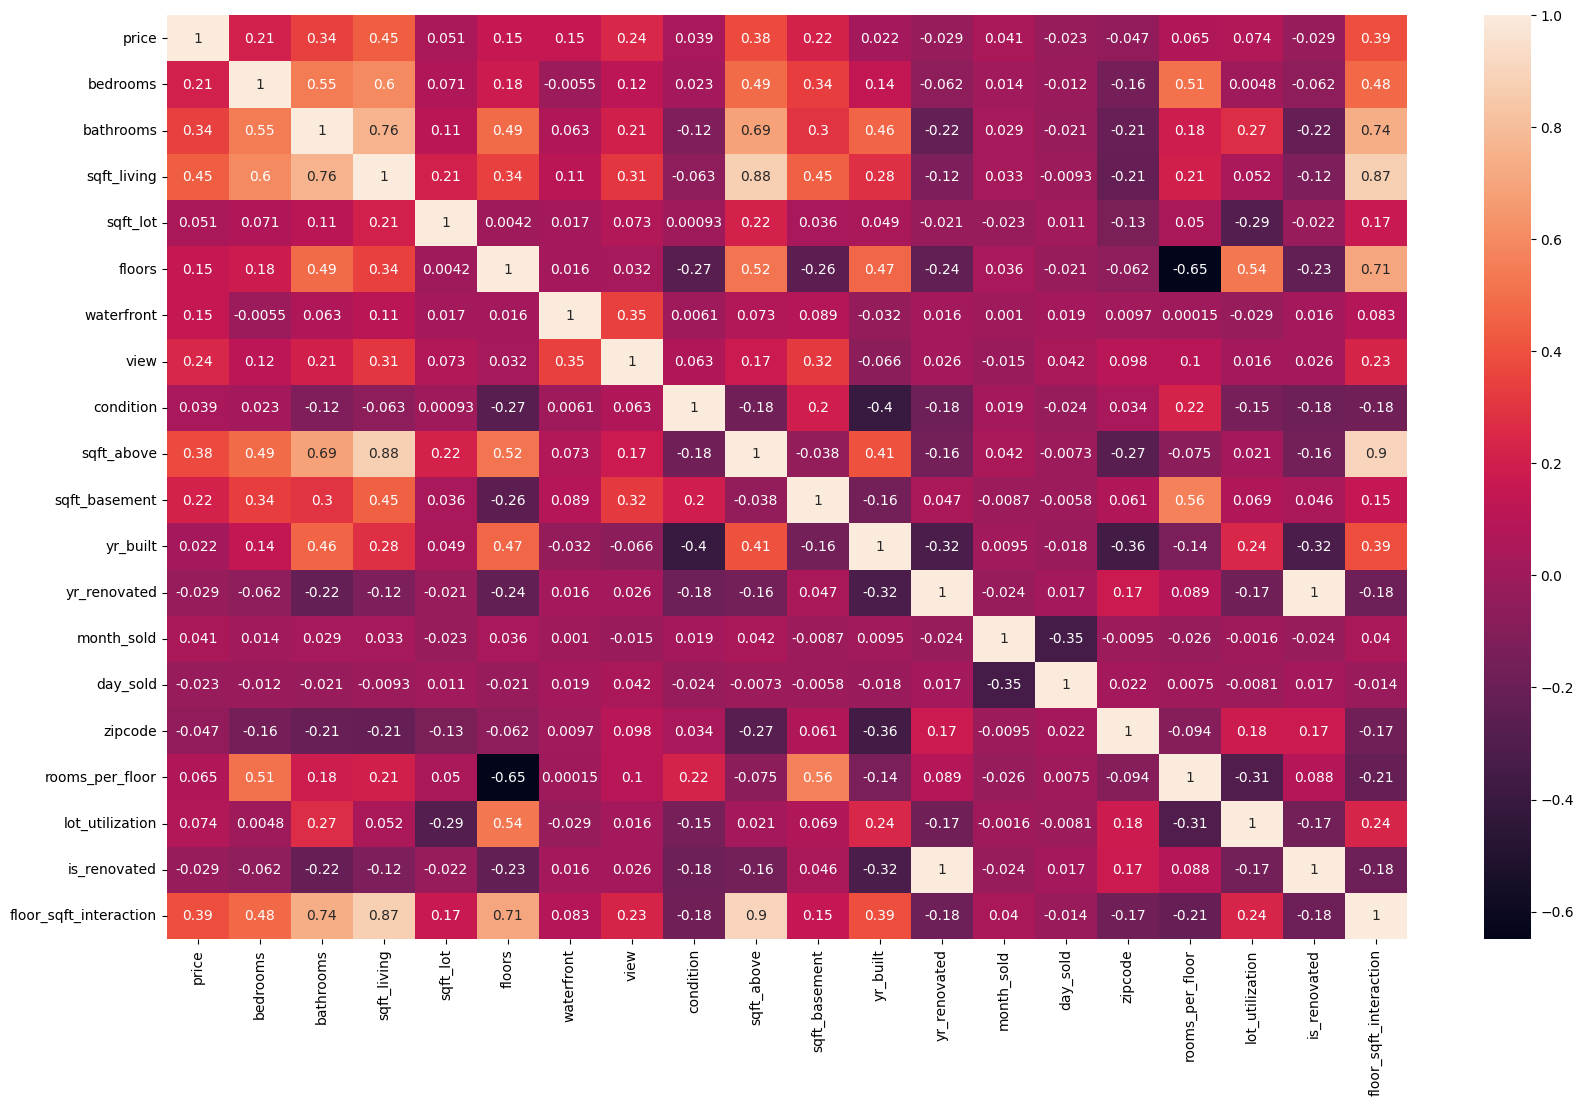

In [109]:
numeric = df.select_dtypes(include=np.number)
heat_map(numeric)

In [110]:
df.drop(columns=["bathrooms"], inplace=True)

Log trasform right-skewed features

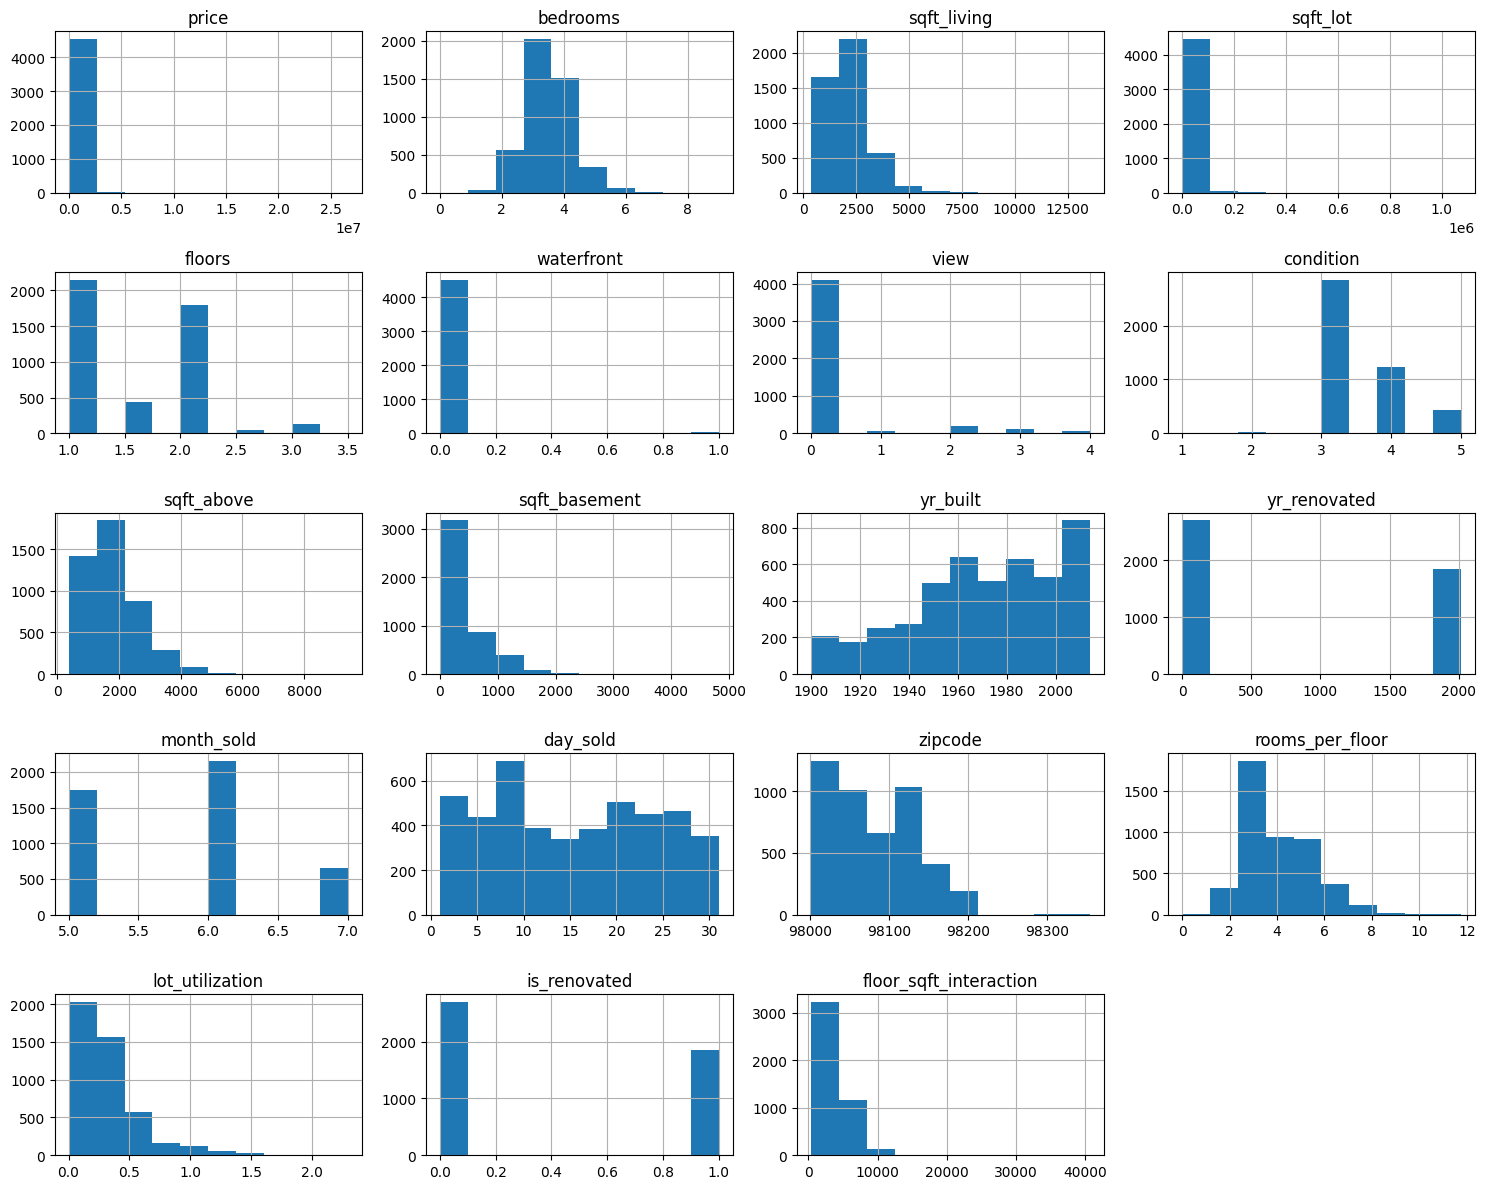

In [111]:
def num_hist(data):
  data.hist(figsize=(15,12))
  plt.tight_layout()

num_hist(df)

In [112]:
df["sqft_living"] = np.log1p(df["sqft_living"])
df["sqft_lot"] = np.log1p(df["sqft_lot"])
df["lot_utilization"] = np.log1p(df["lot_utilization"])
df["floor_sqft_interaction"] = np.log1p(df["floor_sqft_interaction"])

Separate features and target variable

In [113]:
X = df.drop(columns=["price"],axis=1)
y = df["price"]

In [114]:
from sklearn.model_selection import train_test_split

# Separate training and test data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Standardize features

In [115]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separate numeric features and object features
numeric_cols = X_train.select_dtypes(include=["int64", "float64", "int32"]).columns
categorical_cols = X_train.select_dtypes(include=["object"]).columns

# Preprocess pipeline to standardize numeric and encoding categorical features
preprocessor = ColumnTransformer(
    [
        ("Numeric", StandardScaler(), numeric_cols),
        ("Categorical", OneHotEncoder(handle_unknown="ignore", sparse_output=False), categorical_cols),
    ]
)

In [116]:
# Ask model to learn the training data and prepare the test data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

Train model

In [117]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Predict

In [118]:
y_pred = model.predict(X_test)

Evaluation

In [119]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R²: {r2:.4f}")

MSE: 48135162700.80
RMSE: 219397.27
MAE: 131777.78
R²: 0.6764
